In [1]:
# import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [3]:
##############################import database
train = pd.read_csv(r"./input/train.csv")
test = pd.read_csv(r"./input/test.csv")

In [4]:
##############################understand  database
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
# check duplication
train.duplicated().sum()
test.duplicated().sum()

0

In [7]:
# finding missing values
train.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

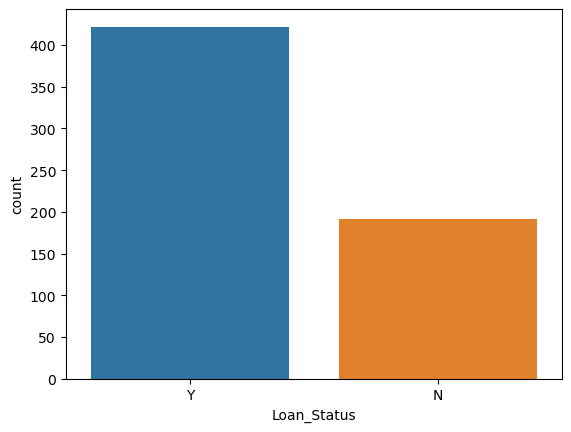

In [8]:
##############################data analysis
# compare loan status
sns.countplot(data=train, x="Loan_Status")

<AxesSubplot:xlabel='Gender', ylabel='count'>

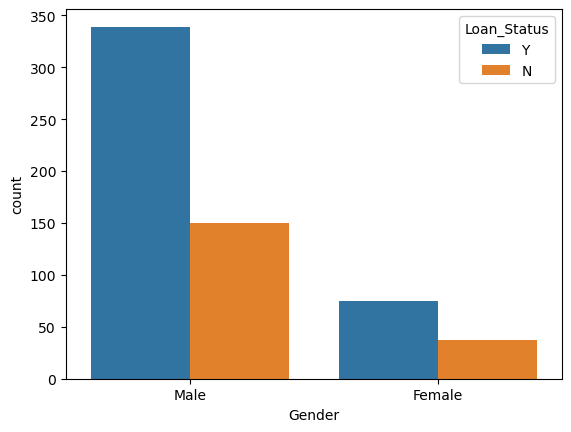

In [9]:
# compare loan status based on gender
sns.countplot(data=train["Loan_Status"], x=train["Gender"], hue=train["Loan_Status"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

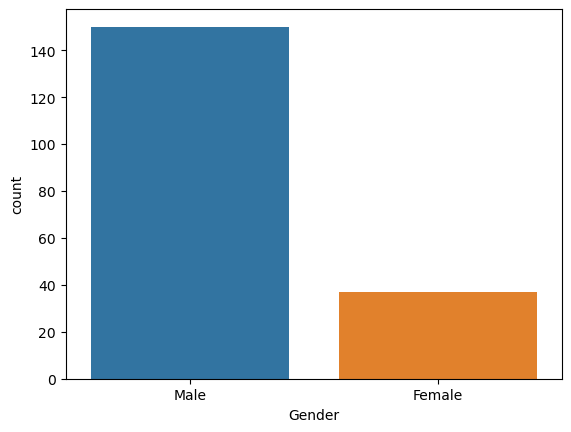

In [10]:
sns.countplot(data = train[train["Loan_Status"]=='N'], x="Gender")

In [11]:
# compare loan approval based on married status
train.groupby("Married")["Loan_Status"].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

In [12]:
train.groupby("Married")["Loan_Status"].value_counts(normalize=True)

Married  Loan_Status
No       Y              0.629108
         N              0.370892
Yes      Y              0.716080
         N              0.283920
Name: Loan_Status, dtype: float64

<AxesSubplot:xlabel='Married', ylabel='count'>

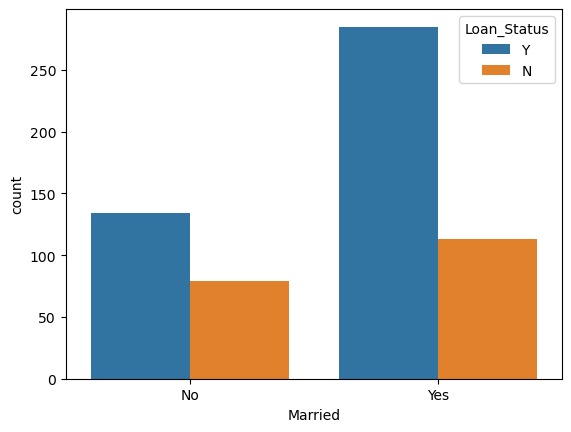

In [13]:
sns.countplot(data=train["Loan_Status"], x=train["Married"], hue=train["Loan_Status"])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

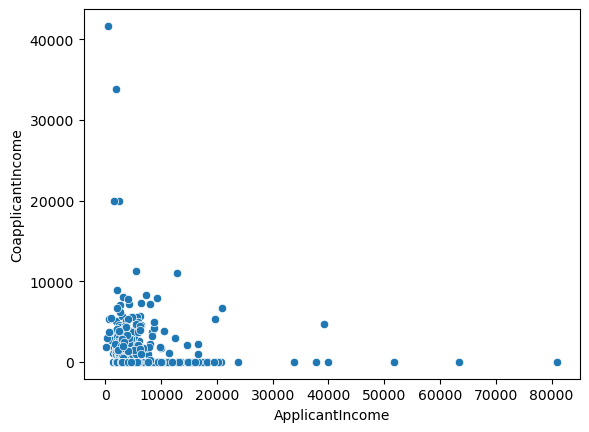

In [14]:
sns.scatterplot(x="ApplicantIncome", y="CoapplicantIncome", data=train)

In [15]:
##############################data cleaning
train.drop(['Loan_ID'], axis=1, inplace=True)
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
train.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

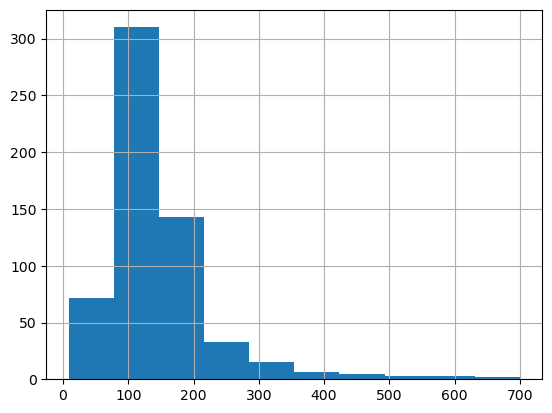

In [17]:
# handle missing values
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].median())
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['LoanAmount'].hist()

LoanAmount           1.000000
ApplicantIncome      0.570909
CoapplicantIncome    0.188619
Loan_Amount_Term     0.039447
Credit_History      -0.001463
Name: LoanAmount, dtype: float64


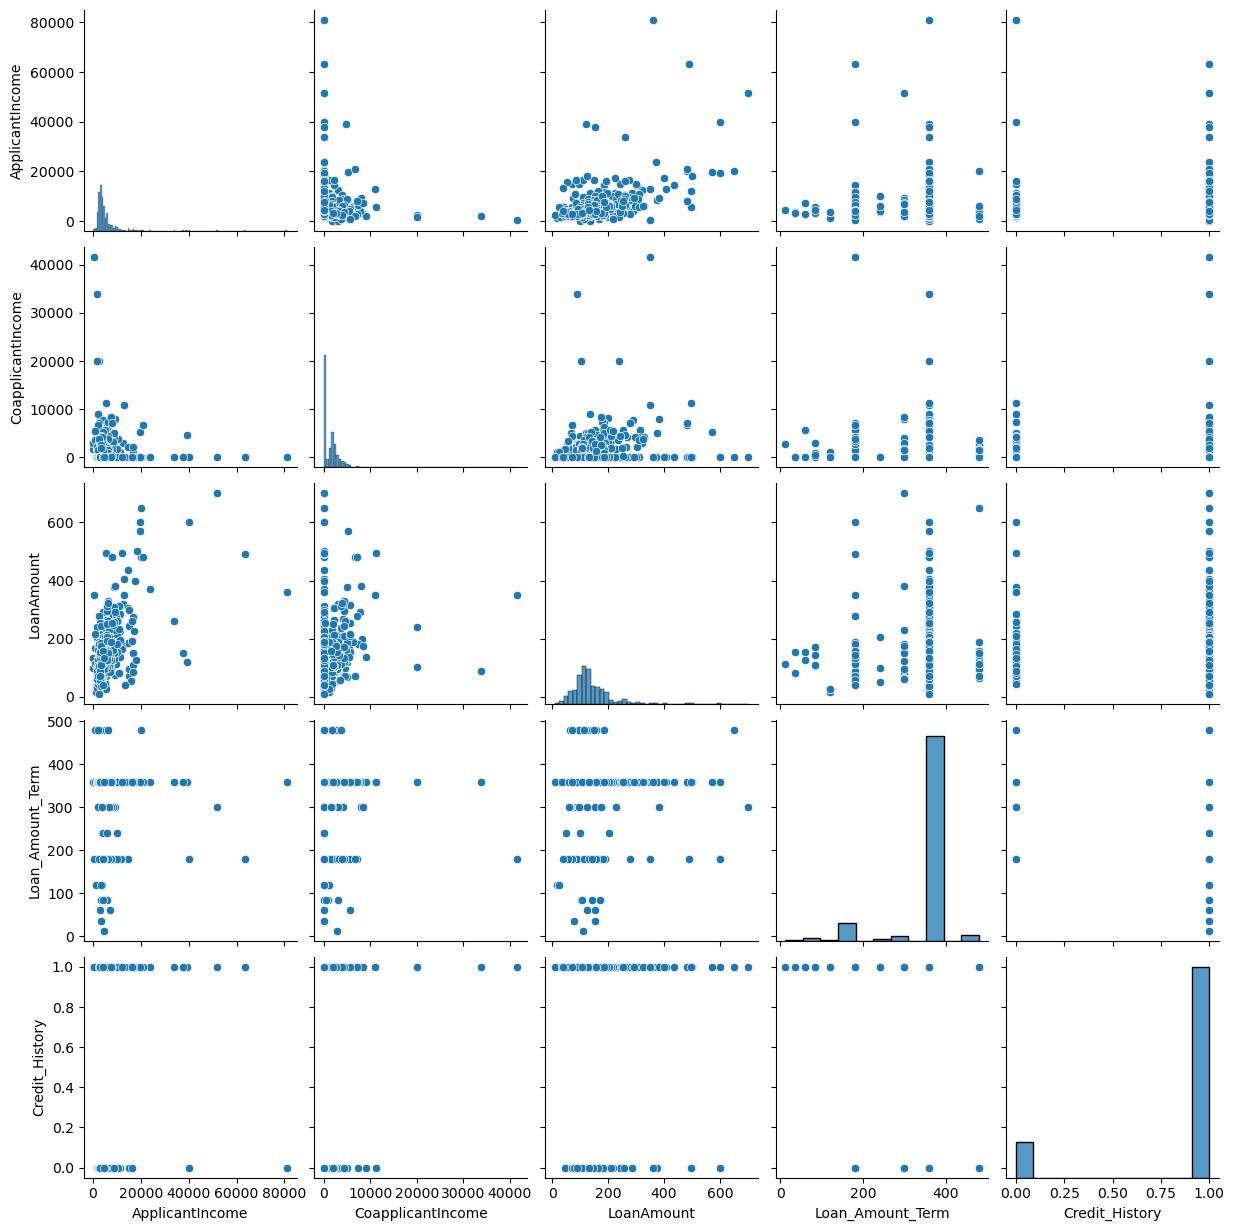

In [18]:
corr_matrix = train.corr()
print(corr_matrix['LoanAmount'].sort_values(ascending=False))
sns.pairplot(train)

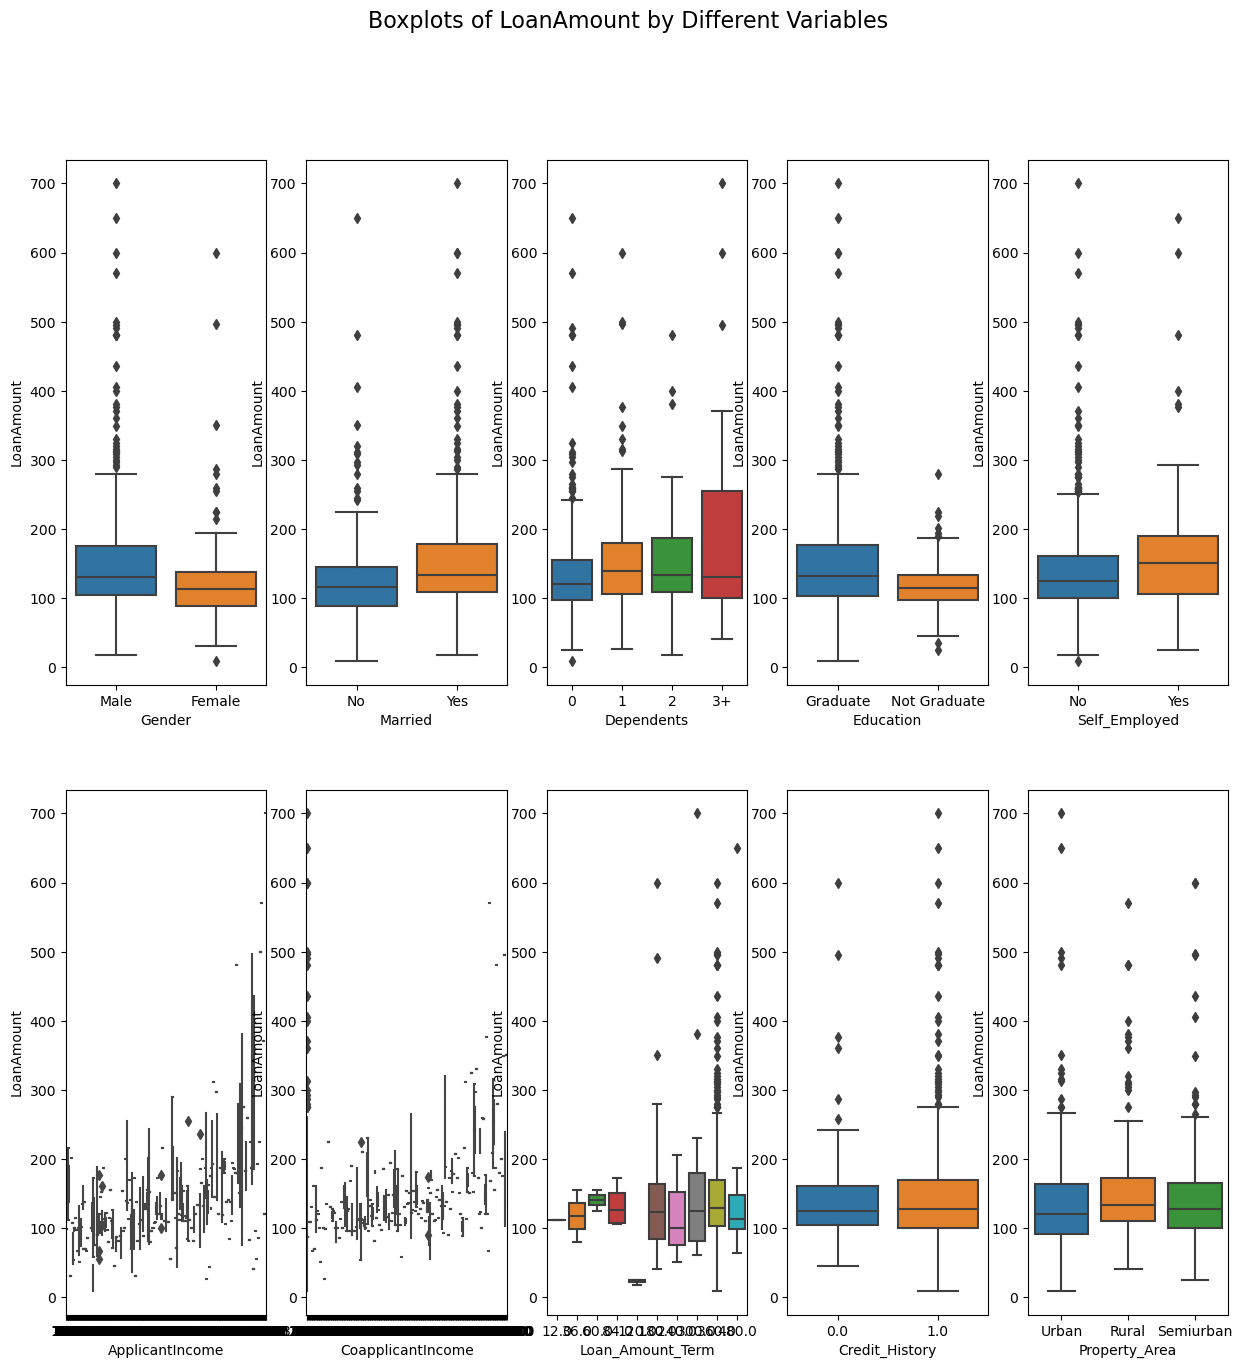

In [19]:
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))

# Create box plots for each column in the subset of the dataframe
sns.boxplot(x='Gender', y='LoanAmount', data=train, ax=axs[0][0])
sns.boxplot(x='Married', y='LoanAmount', data=train, ax=axs[0][1])
sns.boxplot(x='Dependents', y='LoanAmount', data=train, ax=axs[0][2])
sns.boxplot(x='Education', y='LoanAmount', data=train, ax=axs[0][3])
sns.boxplot(x='Self_Employed', y='LoanAmount', data=train, ax=axs[0][4])
sns.boxplot(x='ApplicantIncome', y='LoanAmount', data=train, ax=axs[1][0])
sns.boxplot(x='CoapplicantIncome', y='LoanAmount', data=train, ax=axs[1][1])
sns.boxplot(x='Loan_Amount_Term', y='LoanAmount', data=train, ax=axs[1][2])
sns.boxplot(x='Credit_History', y='LoanAmount', data=train, ax=axs[1][3])
sns.boxplot(x='Property_Area', y='LoanAmount', data=train, ax=axs[1][4])

# Add a main title for the figure
fig.suptitle('Boxplots of LoanAmount by Different Variables', fontsize=16)

# Display the figure
plt.show()
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

<AxesSubplot:>

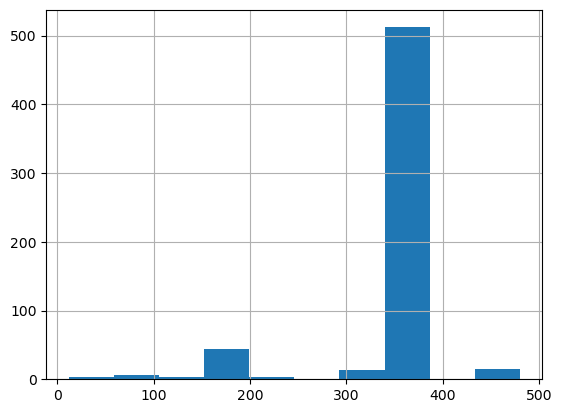

In [20]:
# handle missing values
train['Loan_Amount_Term'].hist()

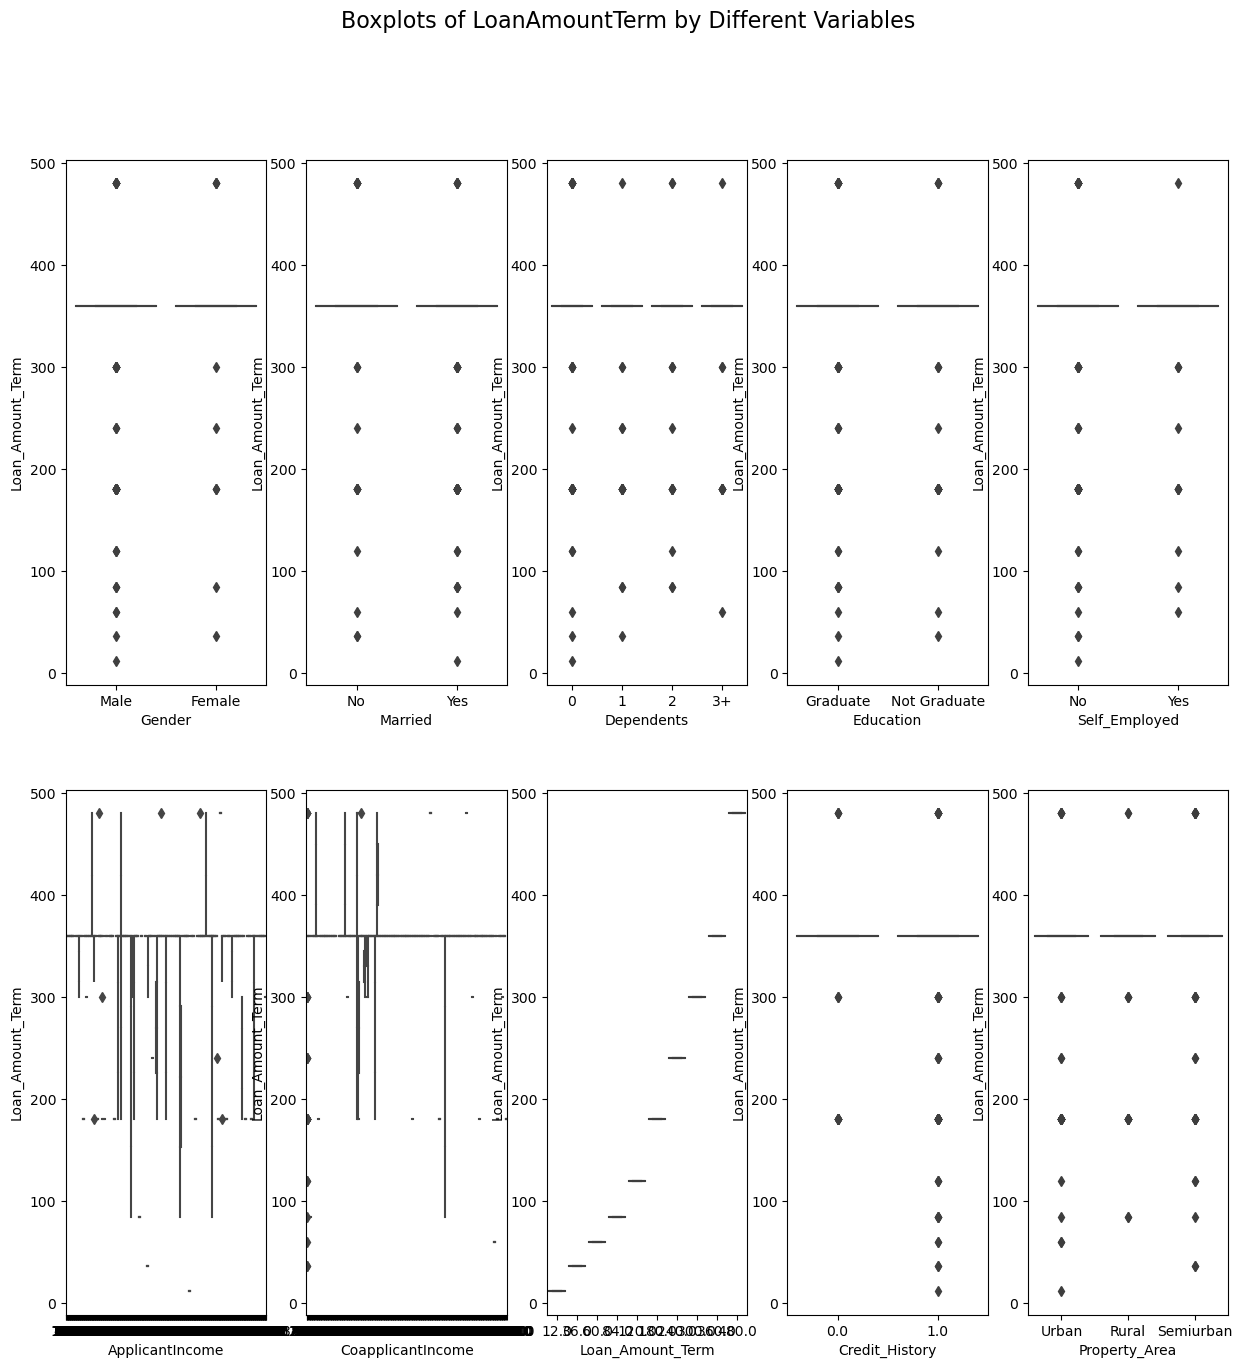

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 15))

# Create box plots for each column in the subset of the dataframe
sns.boxplot(x='Gender', y='Loan_Amount_Term', data=train, ax=axs[0][0])
sns.boxplot(x='Married', y='Loan_Amount_Term', data=train, ax=axs[0][1])
sns.boxplot(x='Dependents', y='Loan_Amount_Term', data=train, ax=axs[0][2])
sns.boxplot(x='Education', y='Loan_Amount_Term', data=train, ax=axs[0][3])
sns.boxplot(x='Self_Employed', y='Loan_Amount_Term', data=train, ax=axs[0][4])
sns.boxplot(x='ApplicantIncome', y='Loan_Amount_Term', data=train, ax=axs[1][0])
sns.boxplot(x='CoapplicantIncome', y='Loan_Amount_Term', data=train, ax=axs[1][1])
sns.boxplot(x='Loan_Amount_Term', y='Loan_Amount_Term', data=train, ax=axs[1][2])
sns.boxplot(x='Credit_History', y='Loan_Amount_Term', data=train, ax=axs[1][3])
sns.boxplot(x='Property_Area', y='Loan_Amount_Term', data=train, ax=axs[1][4])

# Add a main title for the figure
fig.suptitle('Boxplots of LoanAmountTerm by Different Variables', fontsize=16)

# Display the figure
plt.show()
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())

In [22]:
Y = train.Loan_Status
Y = np.where(Y == 'Y', 1, 0)
X = pd.get_dummies(train.drop('Loan_Status',axis=1), drop_first = True)

In [23]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,1,1,0,1,0,0,0,0,1


In [24]:
Y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [25]:
col_names = X.columns
scaler = StandardScaler()
# Fit the scaler to the features
scaler.fit(X)

# Transform the features using the scaler
X_scaled = scaler.transform(X)

# Convert the scaled numpy array back to a dataframe
X = pd.DataFrame(X_scaled, columns=col_names)

# View the standardized data with column names
print(X.head(20))

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0          0.072991          -0.554487    0.000000          0.279851   
1         -0.134412          -0.038732   -0.219273          0.279851   
2         -0.393747          -0.554487   -0.957641          0.279851   
3         -0.462062           0.251980   -0.314547          0.279851   
4          0.097728          -0.554487   -0.064454          0.279851   
5          0.002218           0.880600    1.436099          0.279851   
6         -0.503019          -0.035995   -0.612275          0.279851   
7         -0.387850           0.301914    0.138001          0.279851   
8         -0.228939          -0.032575    0.257093          0.279851   
9          1.218457           3.196713    2.412650          0.279851   
10        -0.360982          -0.315078   -0.910004          0.279851   
11        -0.475660           0.074817   -0.445547          0.279851   
12        -0.381788           2.217871    0.638186          0.27

In [26]:
##############################build model & evaluation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbors', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Gaussian Naive Bayes', GaussianNB()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Support Vector', SVC()))

In [28]:

for name,algorithm in models:
    model= algorithm
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    print('The accuracy of the %s is %f:'%(name,accuracy_score(prediction,Y_test)))
print('\n')

The accuracy of the Logistic Regression is 0.837398:
The accuracy of the Linear Discriminant Analysis is 0.837398:
The accuracy of the K Nearest Neighbors is 0.739837:
The accuracy of the Decision Tree is 0.707317:
The accuracy of the Gaussian Naive Bayes is 0.829268:
The accuracy of the Random Forest is 0.813008:
The accuracy of the Support Vector is 0.813008:




D:\anacoda\anacoda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
